# Assignment 1

In [248]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Part 1: Binning degree distributions

#### Binning real numbers

In [249]:
points = np.empty(5000)

for i in range(5000):
    points[i] = random.gauss(2, 0.125)

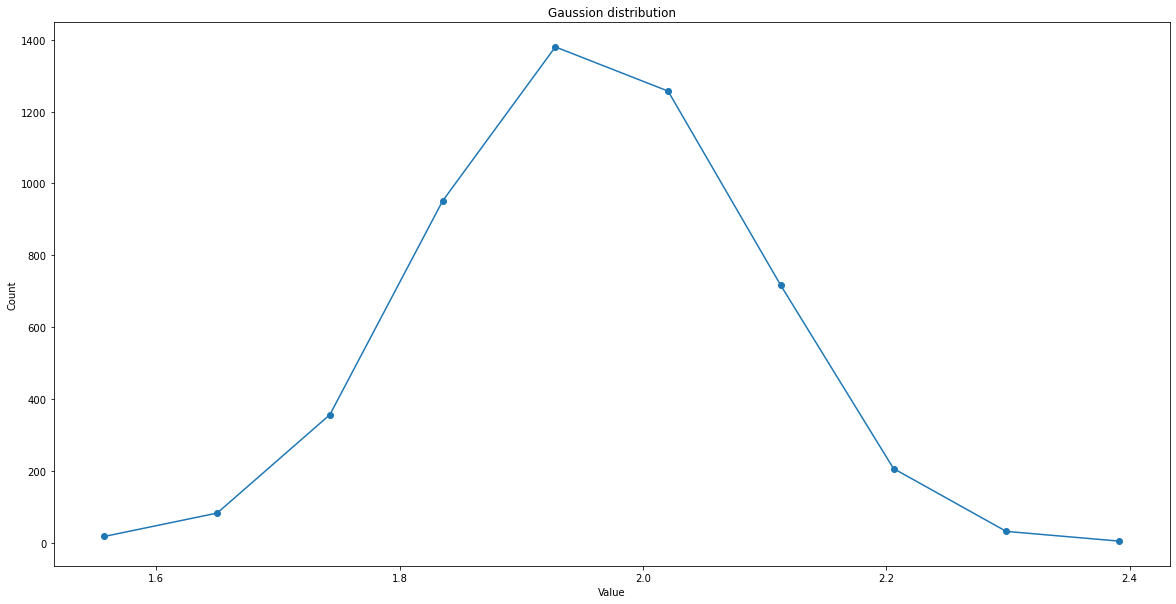

In [250]:
hist, bin_edges = np.histogram(points,10)

plt.figure(figsize=(20,10))
plt.plot(bin_edges[:-1], hist, linestyle = '-', marker='o')
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Gaussion distribution")
plt.show()

###### What does the numpy.histogram function return?  Do the two arrays have the same length?

The numpy.histogram function returns two arrays, one describing the edges of the bins and the other number of values within those edges. The length of the bin edges array is always one greater that the number of bins, so 11 in this case.

###### You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

We deal with this problem by skipping the last element of the bin-edges array. 
By doing this we only keep the lower bound of each bins and plot according to that, on the x-axis.

#### Binning integers

In [251]:
numbers = np.random.poisson(10, 5000)
maxN = max(numbers)
minN = min(numbers)

print("Minimum value: ", minN)
print("Maximum value: ", maxN)

Minimum value:  0
Maximum value:  24


###### (you may want to think about how numpy.histogram deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?)

ANSWER

###### What is the sum over bin counts? 

ANSWER

###### Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

ANSWER

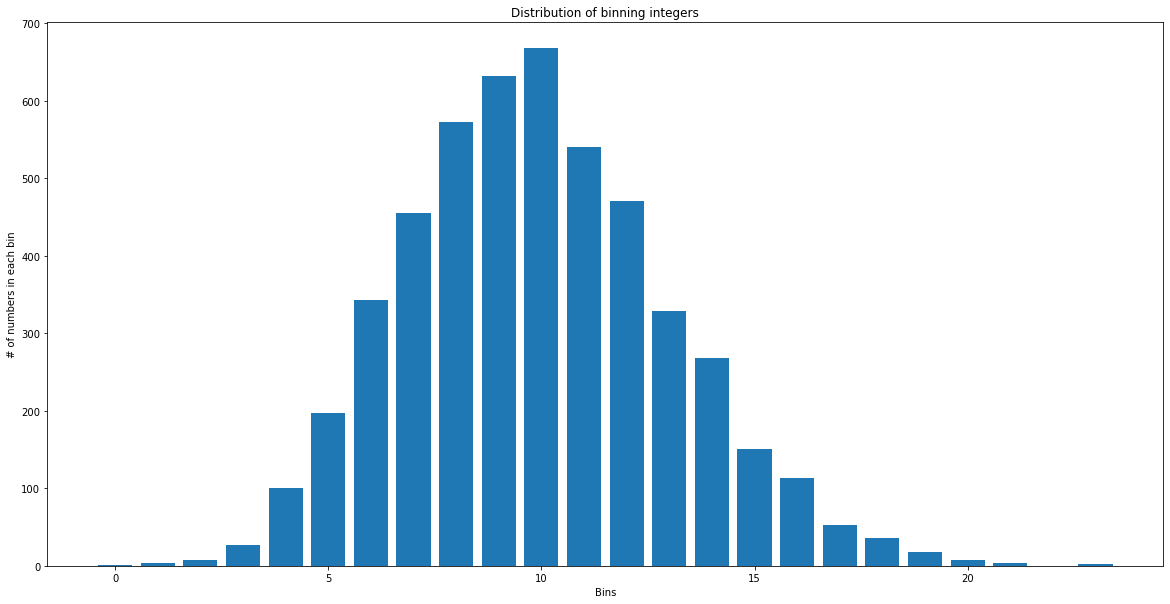

In [252]:
v = np.linspace(minN, maxN, maxN-minN+1)
counts, v = np.histogram(numbers, v)

plt.figure(figsize=(20,10))
plt.bar(v[:-1], counts)

plt.xlabel("Bins")
plt.ylabel("# of numbers in each bin")
plt.title('Distribution of binning integers')
plt.show()

#### Binning and plotting degree distributions

In [253]:
N = 5000
k = 10
p = k/(N-1)

g = nx.erdos_renyi_graph(N,p)

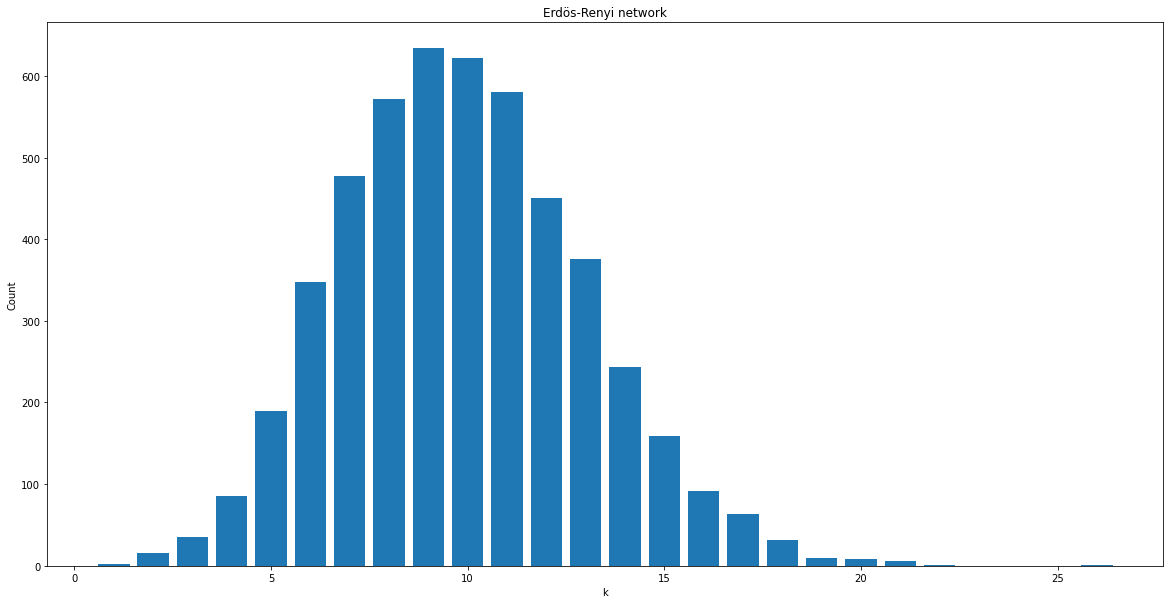

In [254]:
degrees = [g.degree(n) for n in g.nodes()]

maxD = max(g.degree, key=lambda x: x[1])[1]
minD = min(g.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxD-minD)

plt.figure(figsize=(20,10))
plt.bar(bin_edges[:-1],hist)
    
plt.xlabel('k')
plt.ylabel('Count')
plt.title('Erdös-Renyi network')
plt.show()

# ------------------------------------------------------

## Part 2: Random networks and plotting in networkx

Let's start by generate an Erdos-Renyi graph and plot it.

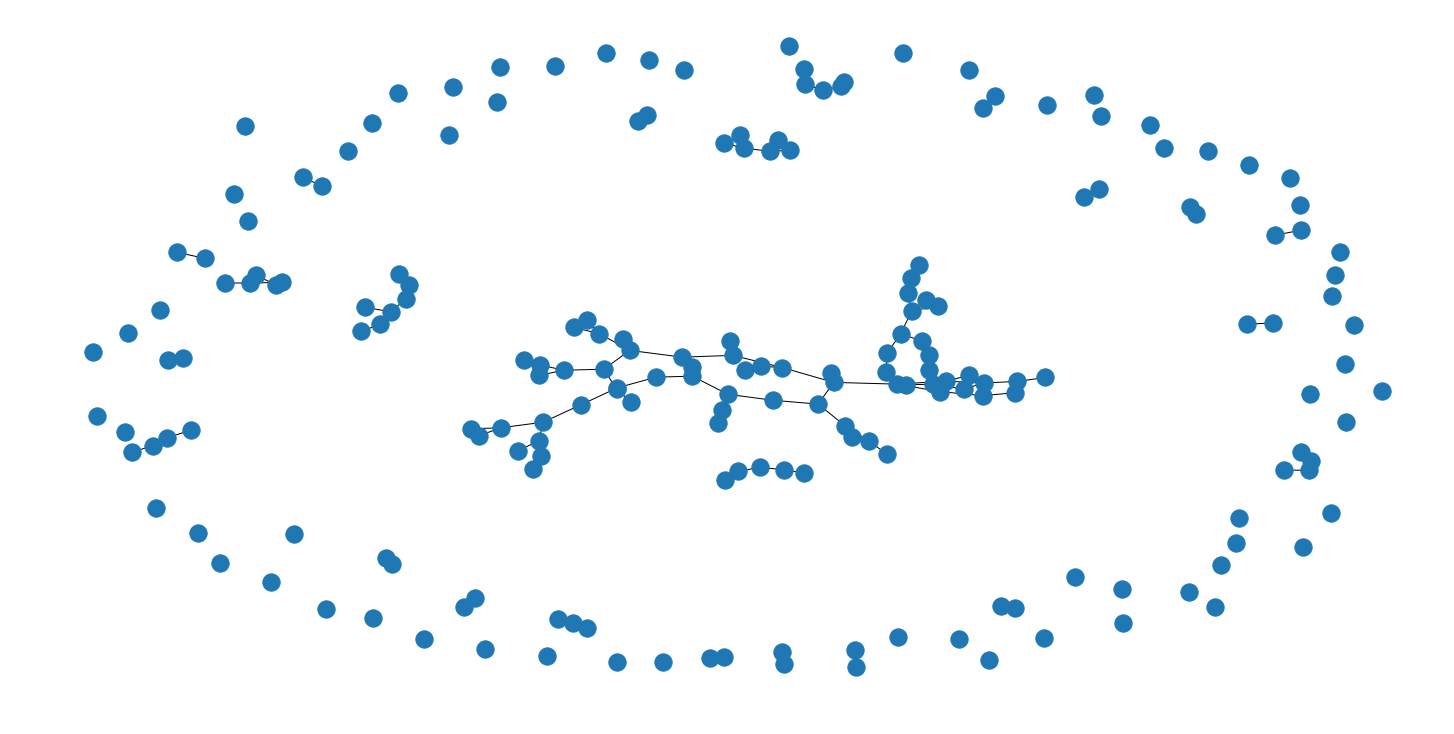

In [255]:
n = 200
k = 1.5
p = k/(n-1)
gnp = nx.fast_gnp_random_graph(n, p)
plt.figure(figsize=(20, 10))
nx.draw(gnp)

Now we will extract the Giant Component from this graph.

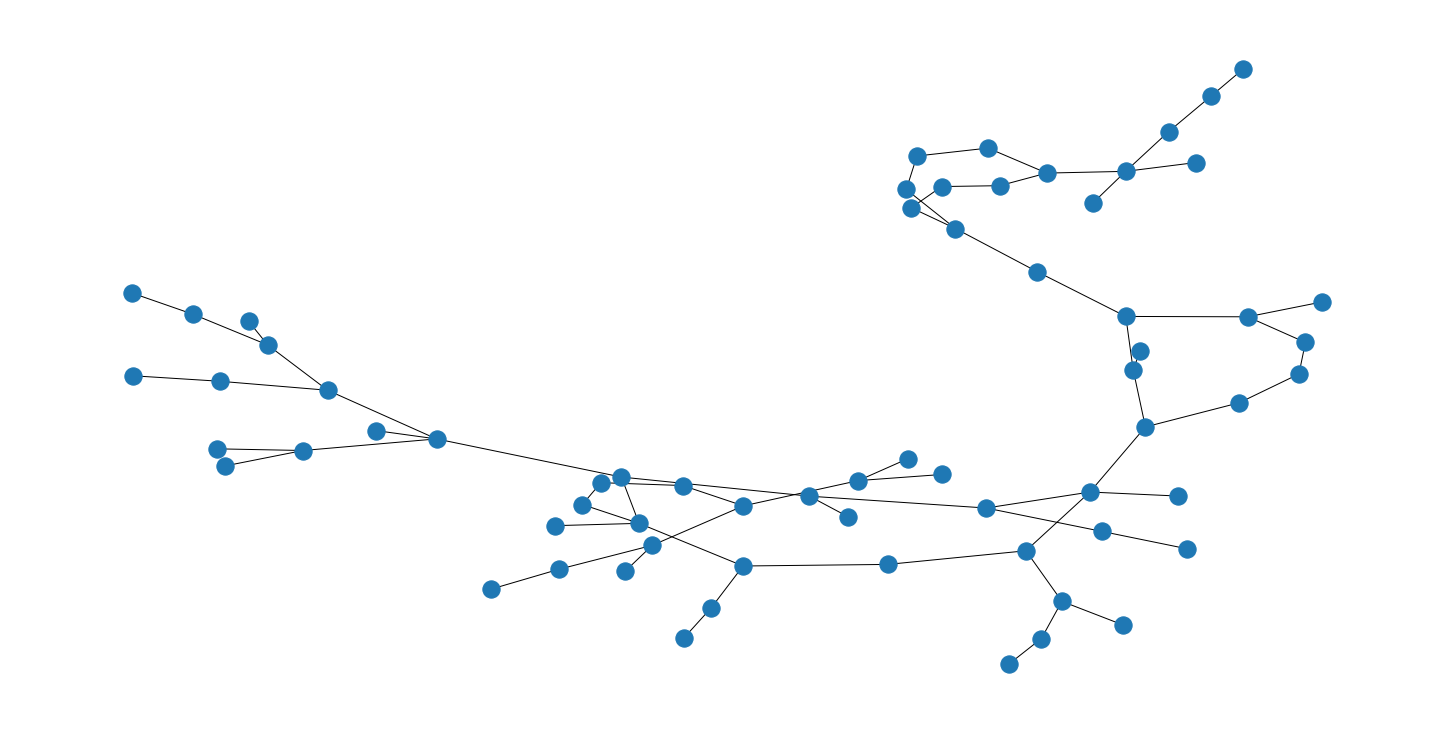

In [256]:
giant = list(max(nx.connected_components(gnp), key=len))
gcc = gnp.subgraph(giant).copy()
plt.figure(figsize=(20, 10))
nx.draw(gcc)

Now let's select a random node from the giant component.

In [257]:
groundZero = random.choice(giant)
print(groundZero)

119


Now we can find all nodes that are 2 steps away from our target node.

In [258]:
dist = dict(nx.single_source_shortest_path_length(gcc,groundZero))

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

keys = getKeysByValue(dist,2)
print(keys)

[42, 187]


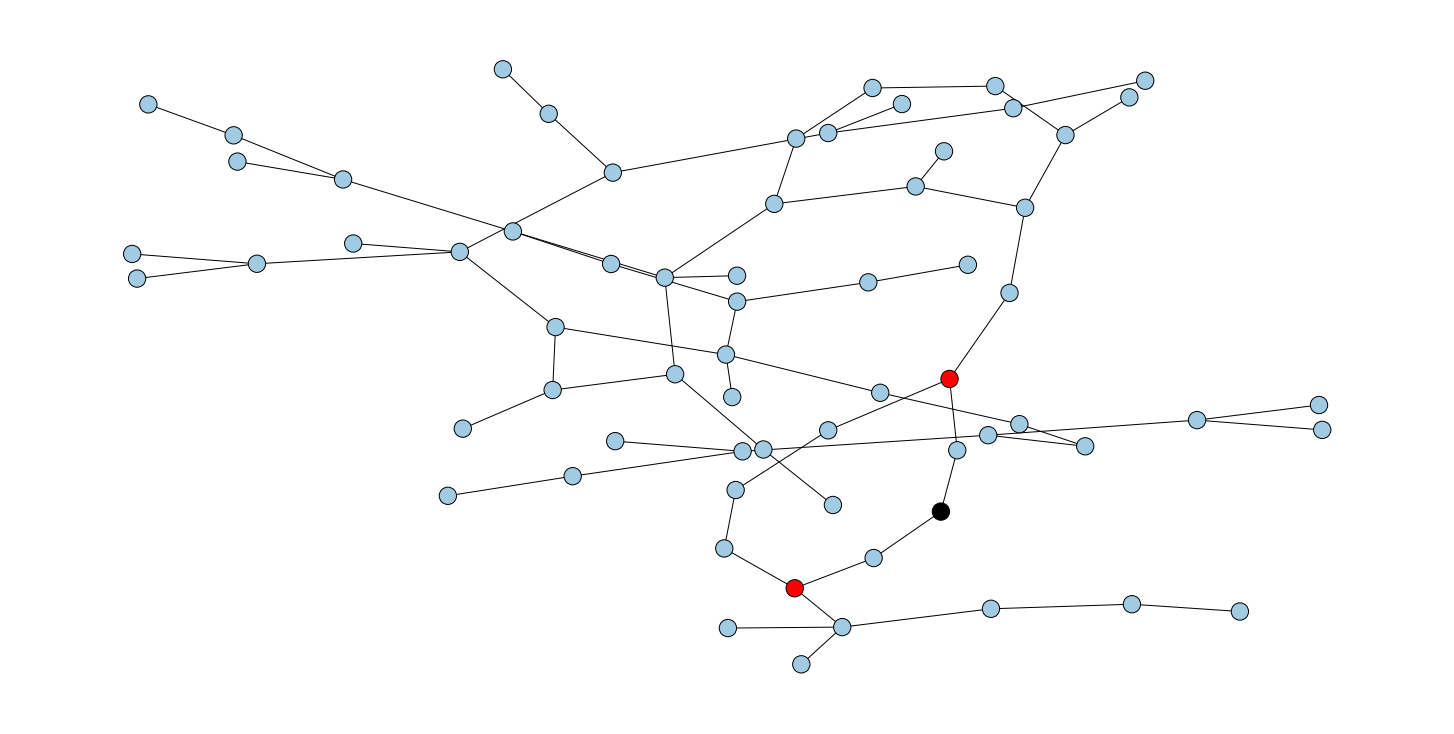

In [259]:
color_map = []
for node in gcc:
    if node == groundZero:
        color_map.append('#000000')
    elif node in keys: 
        color_map.append('#ff0000')
    else:
        color_map.append('#A0CBE2')
        
plt.figure(figsize=(20, 10))
nx.draw(gcc, node_color=color_map, edgecolors="black")

# ------------------------------------------------------

## Part 3: Watts-Strogatz Networks

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 

Average shortest path length:  62.875751503006015
Average shortest path length:  7.489955911823647
Average shortest path length:  4.809691382765531


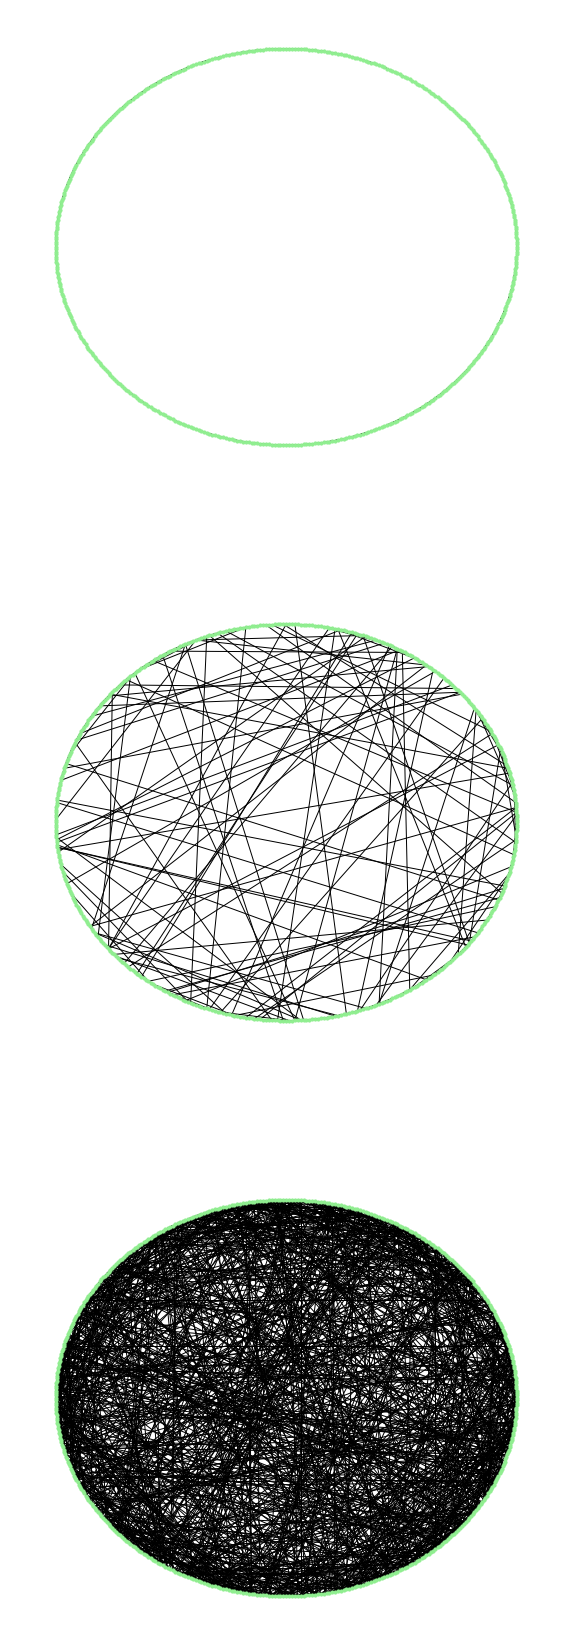

In [260]:
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

graphs = [G1, G2, G3]

f,axs = plt.subplots(3,1,figsize=(10,30))

for count, graph in enumerate(graphs):
    nx.draw_shell(graph, ax=axs[count], node_color='lightgreen', label = 'test', node_size=10)
    print("Average shortest path length: ", nx.average_shortest_path_length(graph))

plt.show()

**Describe what happens to the network when $p = 1$**

Each random long-range link can significantly decrease the average shortest path of a Watts-Strogatz network. When the percentage is 1 in a Watts-Strogatz graph the probability of each node being connected with a random node instead of each node being connected with their k nearist neighbours is 100%. Therefore the average shortest path is as small as can be when the percentage is 1. 

Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [261]:
#probabilities for graphs
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

av_sp_by_p = []
stdevs_by_p = []

#Create 50 Watts-Strogatz Networks and calculate standard deviation and average shortest path by each percentage
for x in p:
    average_paths = []
    for y in range(50):
        G = nx.watts_strogatz_graph(500, 4, x)
        sp = nx.average_shortest_path_length(G)
        average_paths.append(sp)

    av_sp_by_p.append(np.average(average_paths))
    stdevs_by_p.append(np.std(average_paths))

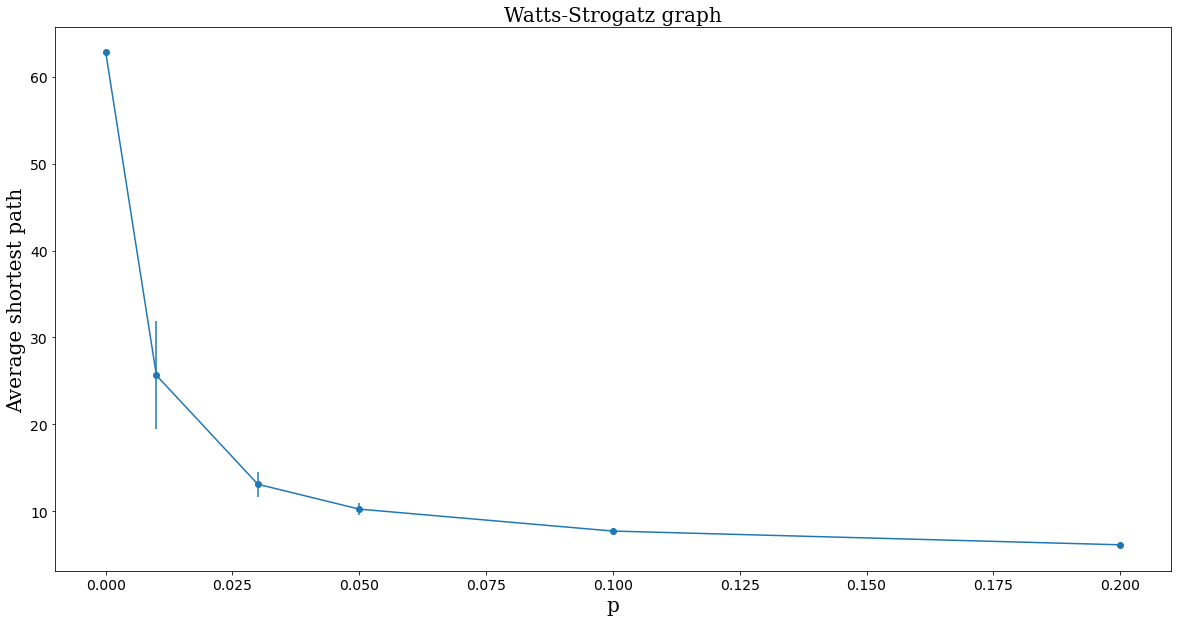

In [262]:
font = {'family':'serif','color':'black','size':20}

plt.figure(figsize=(20,10))

# plotting the points where the x axis is p and the y axis is the average shortest path.
plt.errorbar(p, av_sp_by_p, yerr=stdevs_by_p, linestyle = '-', marker='o')


# naming the x axis
plt.xlabel('p', fontdict = font)
plt.xticks(fontsize=14)

# naming the y axis
plt.ylabel('Average shortest path', fontdict = font)
plt.yticks(fontsize=14)
 
# graph title
plt.title('Watts-Strogatz graph', fontdict = font)
 

plt.show()

# ------------------------------------------------------


## Part 4: The Barabasi-Albert Model

In [263]:
def BAGraph(size):   
    tmp = nx.Graph()
    tmp.add_nodes_from([1,2])
    tmp.add_edge(1,2)
    #Create a list of all the edges in the graph and flatten the list
    edges = list(tmp.edges)
    flat_list = [item for sublist in edges for item in sublist]

    for i in range(3,size+1):
        edges = list(tmp.edges)
        flat_list = [item for sublist in edges for item in sublist]
        x = random.choice(flat_list)
        tmp.add_node(i)
        tmp.add_edge(i,x)
    return tmp 

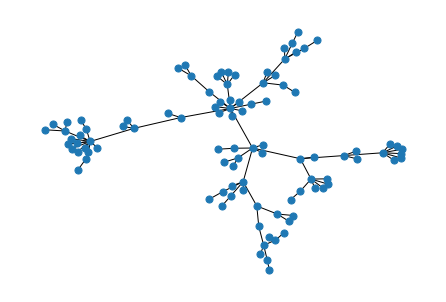

In [264]:
G = BAGraph(100)
nx.draw(G, node_size = 50)

In [265]:
G5000 = BAGraph(5000)

In [266]:
print("Maximum degree:", max(G5000.degree, key=lambda x: x[1])[1])
print("Minimum degree:", min(G5000.degree, key=lambda x: x[1])[1])

Maximum degree: 116
Minimum degree: 1


Text(0, 0.5, 'Count')

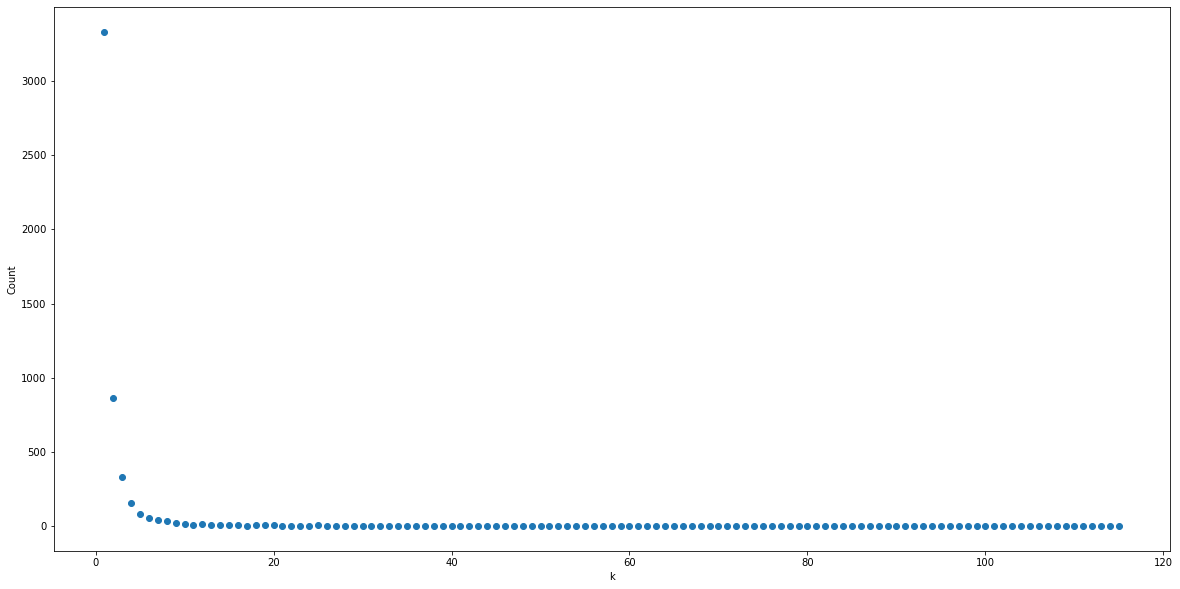

In [267]:
degrees = [G5000.degree(n) for n in G5000.nodes()]
#print(degrees)
#print(np.histogram(degrees))
maxx = max(G5000.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxx-1)

plt.figure(figsize=(20,10))
plt.scatter(bin_edges[:-1],hist)
plt.xlabel("k")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

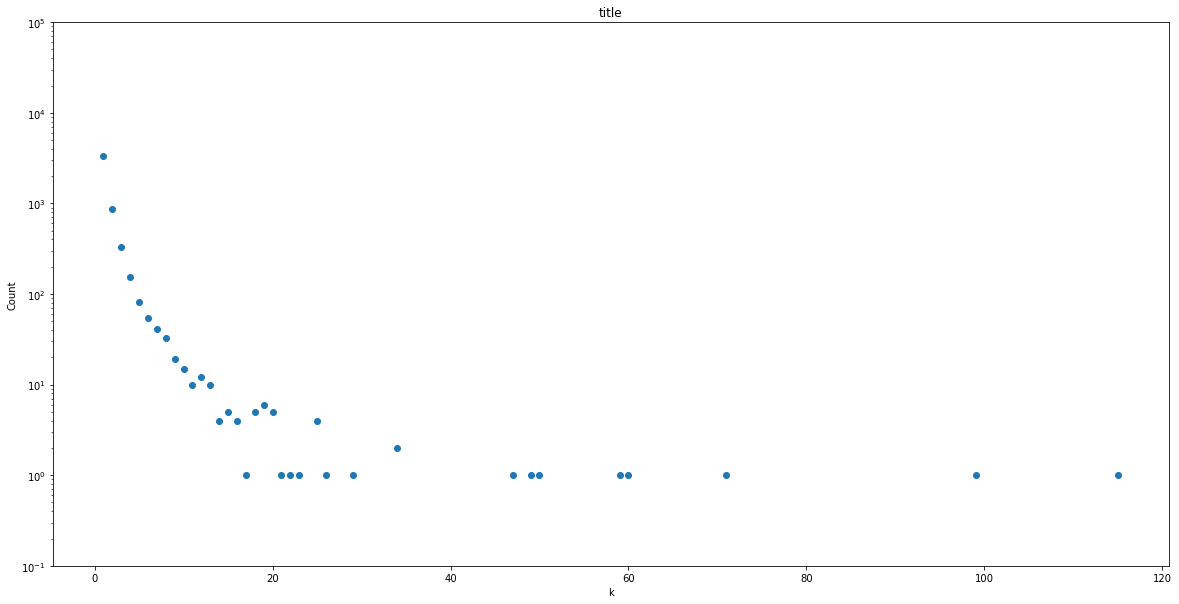

In [268]:
fig, ax = plt.subplots(figsize=(20,10))
  
ax.set_yscale("log")
ax.scatter(bin_edges[:-1],hist)
  
ax.set_ylim(1E-1, 1e5)

plt.title("title")
plt.xlabel("k")
plt.ylabel("Count")


# ------------------------------------------------------


## Part 5: Power-laws and the friendship paradox

In [269]:
#Create a 5000 node BA graph
G5000 = BAGraph(5000)  

In [270]:
#Pick a node i at random (e.g. use random.choice). Find its degree.
rNode = random.choice(list(G5000))

rNodeDegree = G5000.degree(rNode)

print("Our random node: ", rNode)
print("The degree of the random node: ", rNodeDegree)

Our random node:  4215
The degree of the random node:  1


In [271]:
#Find i's neighbors. And calculate their average degree.
nodeNeighbors = list(G5000.neighbors(rNode))
print("The node's neighbours: ", nodeNeighbors)

p = [G5000.degree(n) for n in nodeNeighbors]
ave = sum(p)/len(p)
print("Average degree of neighbour nodes", ave)

The node's neighbours:  [2311]
Average degree of neighbour nodes 4.0


In [272]:
#Compare the two numbers to check if it's true that i's friends (on average)
#have more friends than i.

def friendship(G, node):
    nodeNeighbors = list(G.neighbors(node))

    p = [G.degree(n) for n in nodeNeighbors]
    ave = sum(p)/len(p)
    
    return G.degree(node) < ave



#Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

randomNodes = random.sample(list(G5000), 1000)
counter = 0

for i in randomNodes:
     if friendship(G5000, i):
            counter += 1
            
print("The friendship paradox is true in: ", counter/len(randomNodes)*100, "% of the time")

The friendship paradox is true in:  86.5 % of the time


In [273]:
size = 5000

def BAGraphWithout(size):   
    tmp = nx.Graph()
    tmp.add_nodes_from([1,2])
    tmp.add_edge(1,2)
    #Create a list of all the edges in the graph and flatten the list
#     nodes = list(tmp.nodes)
#     flat_list = [item for sublist in nodes for item in sublist]

    for i in range(3,size+1):
        nodes = list(tmp.nodes)
#         flat_list = [item for sublist in nodes for item in sublist]
        x = random.choice(nodes)
        tmp.add_node(i)
        tmp.add_edge(i,x)
    return tmp

g2 = BAGraphWithout(size)
# nx.draw(g2, node_size = 50)

In [274]:
nodesInG2 = [g2.degree(n) for n in g2.nodes]
G2ave = sum(nodesInG2)/len(nodesInG2)
prob = G2ave/(size-1)

In [275]:
g3 = nx.erdos_renyi_graph(size, prob)

###### Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

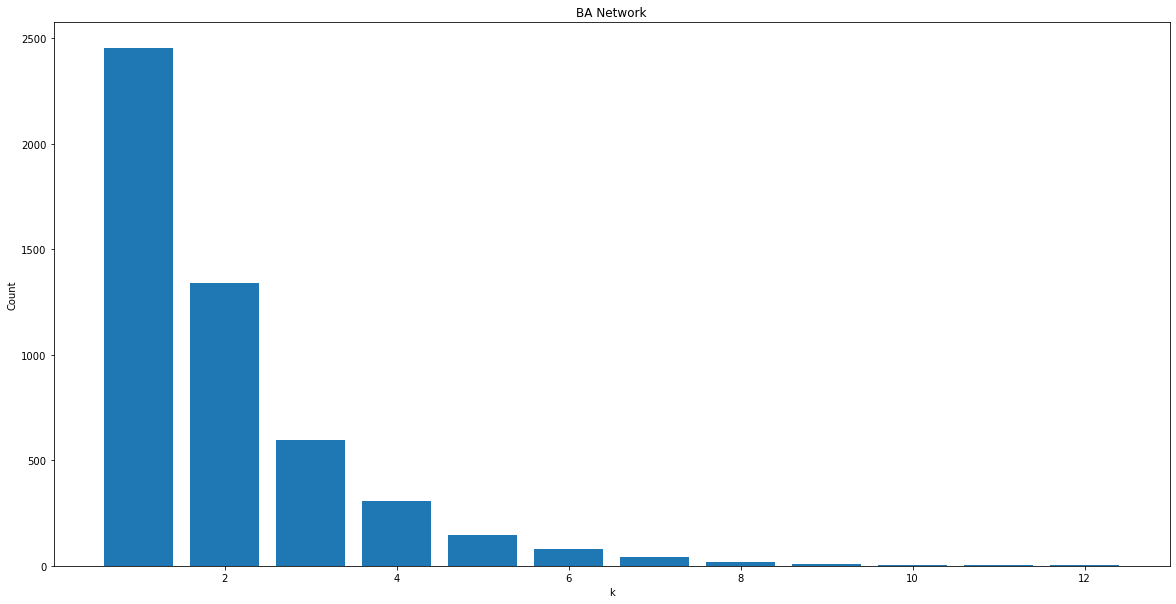

In [276]:
degrees = [g2.degree(n) for n in g2.nodes()]

maxx = max(g2.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxx-1)

plt.figure(figsize=(20,10))
plt.bar(bin_edges[:-1],hist)
plt.xlabel("k")
plt.ylabel("Count")
plt.title("BA Network")
plt.show()

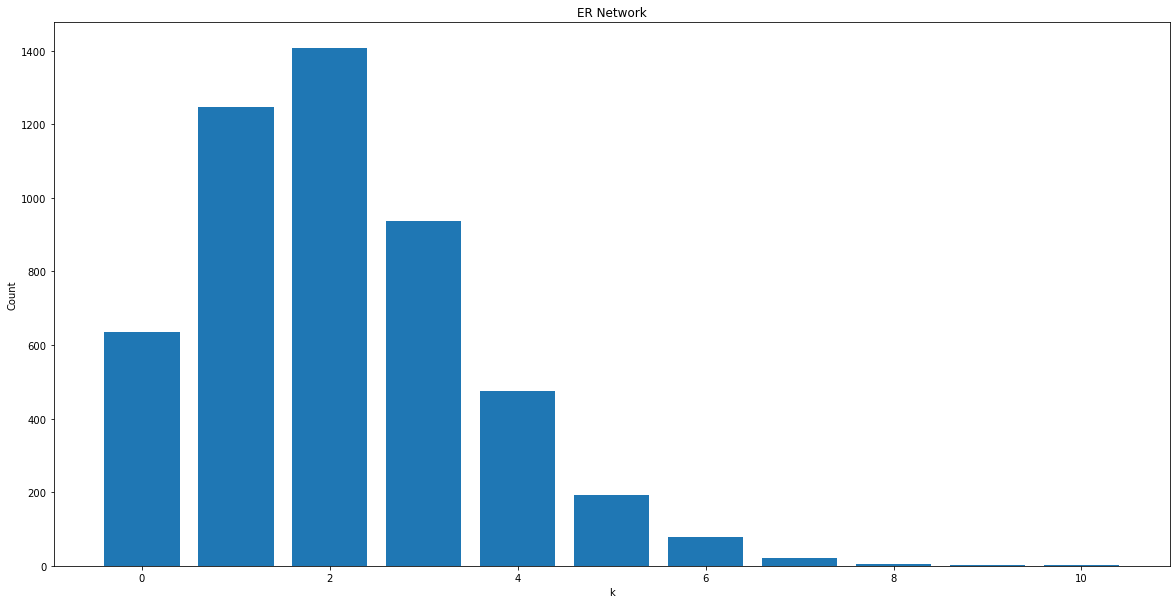

In [277]:
degrees = [g3.degree(n) for n in g3.nodes()]

maxx = max(g3.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxx)

plt.figure(figsize=(20,10))
plt.bar(bin_edges[:-1],hist)
plt.xlabel("k")
plt.ylabel("Count")
plt.title("ER Network")
plt.show()

In [278]:
print("Number of edges in BA graph", len(g2.edges))
print("Number of edges in ER graph", len(g3.edges))

Number of edges in BA graph 4999
Number of edges in ER graph 5203


As we can see the degree distribution for the BA and ER networks, of the same size and degree differ. In the ER network nodes can have no connections while in the BA network that is not possible. 

In the BA network a majority of the nodes have only one connection while the number of nodes with a higher degree become rapidly decreases. On the other hand, in the ER network the average degree is much more spread out and resembles a binomial distribution. In the ER network there is a similar number of nodes with one or two connections while there is a drastic difference in the BA network.